In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [8]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
# renaming columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns=col_names

In [11]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
df.describe()


,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [14]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
 X=df.drop('class',axis=1)
 Y=df['class']

In [16]:
le=LabelEncoder()
Y=le.fit_transform(Y)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,train_size=0.7)

In [23]:
 oe=OrdinalEncoder()
 x_train=oe.fit_transform(x_train)
 x_test=oe.transform(x_test)

In [25]:
rfc=RandomForestClassifier( n_estimators=100,
                            criterion='gini',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features='sqrt',
                            bootstrap=True,
                          )

In [26]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
y_pred=rfc.predict(x_test)

In [29]:
dataframe=pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
dataframe

,Real Values,Predicted Values
0,2,2
1,2,2
2,2,2
3,0,0
4,2,2
...,...,...
514,2,2
515,2,2
516,2,2
517,2,2


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       118
           1       0.85      0.65      0.73        17
           2       0.98      0.99      0.99       361
           3       0.81      0.91      0.86        23

    accuracy                           0.96       519
   macro avg       0.90      0.87      0.88       519
weighted avg       0.96      0.96      0.96       519



<Axes: >

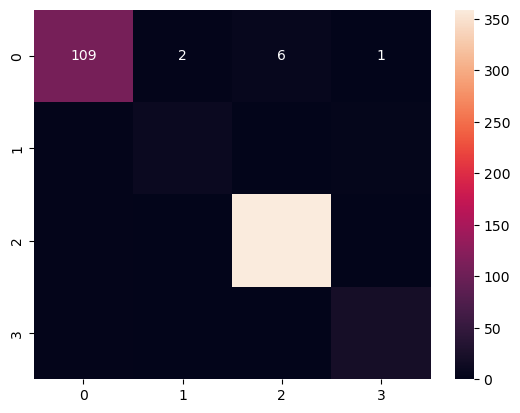

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')